# Выпускная квалификационная работа по курсу «Data Science»

In [1]:
# Импортирую необходимые библиотеки
import pandas as pd
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

In [2]:
# Импорт библиотеки TensorFlow
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.11.0


In [3]:
# Загружаем датасет из файла X_bp.xlsx
x_bp = pd.read_excel('data/X_bp.xlsx', index_col=0)
x_bp.shape

(1023, 10)

In [4]:
# Загружаем датасет из файла X_nup.xlsx
x_nup = pd.read_excel('data/X_nup.xlsx', index_col=0)
x_nup.shape

(1040, 3)

In [5]:
# Общая информация по датасету x_bp
x_bp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10)
memory usage: 87.9 KB


In [6]:
x_bp.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  
0                    220.0  
1                    220.0  
2                    220.0  
3                    220.0  
4                    220.0

In [7]:
# Описательная статистика по датасету x_bp
x_bp.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.930366       1975.734888   
std                           0.913222         73.729231   
min                           0.389403       1731.764635   
25%                           2.317887       1924.155467   
50%                           2.906878       1977.621657   
75%                           3.552660       2021.374375   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  
count                    1023.000000              1023.000000  
mean                     2466.922843               218.423144  
std                       485.628006                59.735931  
min                      1036.856605                33.803026  
25%                      2135.850448               179.627520  
50%                      2459.524526               219.198882  
75%                      2767.193119               257.481724  
max                      3848.436732               414.590628

In [8]:
# Общая информация по датасету x_nup
x_nup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 0 to 1039
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Угол нашивки, град  1040 non-null   int64  
 1   Шаг нашивки         1040 non-null   float64
 2   Плотность нашивки   1040 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 32.5 KB


In [9]:
x_nup.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                   0          4.0               57.0
1                   0          4.0               60.0
2                   0          4.0               70.0
3                   0          5.0               47.0
4                   0          5.0               57.0

In [10]:
# Описательная статистика по датасету x_nup
x_nup.describe()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
count          1040.00000  1040.000000        1040.000000
mean             45.00000     6.911385          57.248399
std              45.02165     2.555181          12.332438
min               0.00000     0.000000           0.000000
25%               0.00000     5.102256          49.970740
50%              45.00000     6.938000          57.413594
75%              90.00000     8.587662          65.107235
max              90.00000    14.440522         103.988901

In [11]:
# Объединем датасеты х_bp и х_nup по индексу, тип объединения INNER
df = x_bp.join(x_nup, how='inner')
df.shape

(1023, 13)

In [12]:
# Посмотрим общую информацию по объединенному датасету df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [13]:
df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0  
1                    220.0                   0          4.0               60.0  
2                    220.0                   0          4.0               70.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0

In [14]:
# Проверим на пустые значения
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [15]:
# Проверим на дубликаты
df.duplicated().sum()

0

In [16]:
# Определим количество уникальных значений по столбцам
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [17]:
# Изменим названия столбцов для лучшей читабельности и восприятия
df = df.rename(columns={"Соотношение матрица-наполнитель": "Target3: Соотношение матрица-наполнитель",
                        "Плотность, кг/м3": "Плотность",
                        "модуль упругости, ГПа": "Модуль упругости",
                        "Количество отвердителя, м.%": "Количество отвердителя",
                        "Содержание эпоксидных групп,%_2": "Содержание эпоксидных групп",
                        "Температура вспышки, С_2": "Температура вспышки",
                        "Поверхностная плотность, г/м2": "Поверхностная плотность",
                        "Модуль упругости при растяжении, ГПа": "Target1: Модуль упругости при растяжении",
                        "Прочность при растяжении, МПа": "Target2: Прочность при растяжении",
                        "Потребление смолы, г/м2": "Потребление смолы",
                        "Угол нашивки, град": "Угол нашивки"})

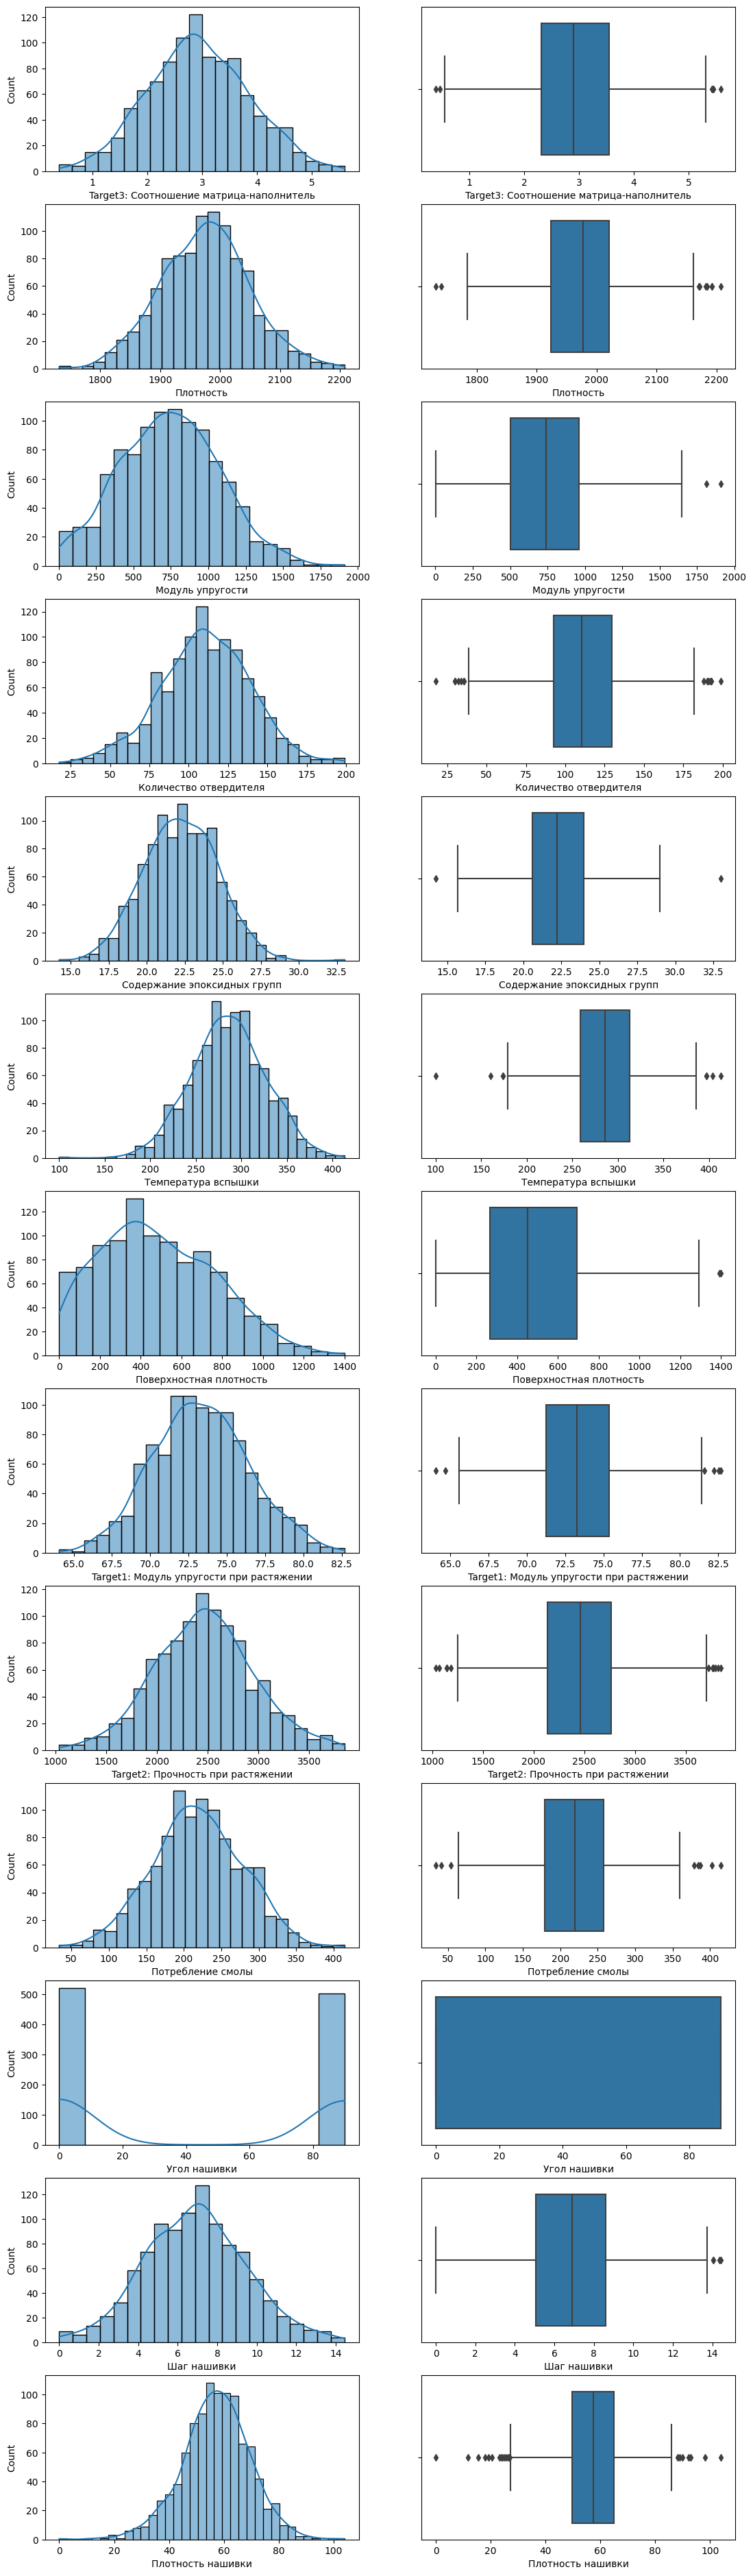

In [18]:
# Построим графики распределения переменных и диаграммы "ящики с усами".

fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for k, column in enumerate(df.columns):    
    sns.histplot(data=df, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=df, x=column, ax=axes[k, 1])
plt.show()

Почти все признаки представлены нормальным распределением, за исключением трех преременных: 
- распределение модуля упругости и поверхностной плотности немного смещены влево.  
- признак угол нашивки имеет только 2 параметра: 0 и 90 градусов.

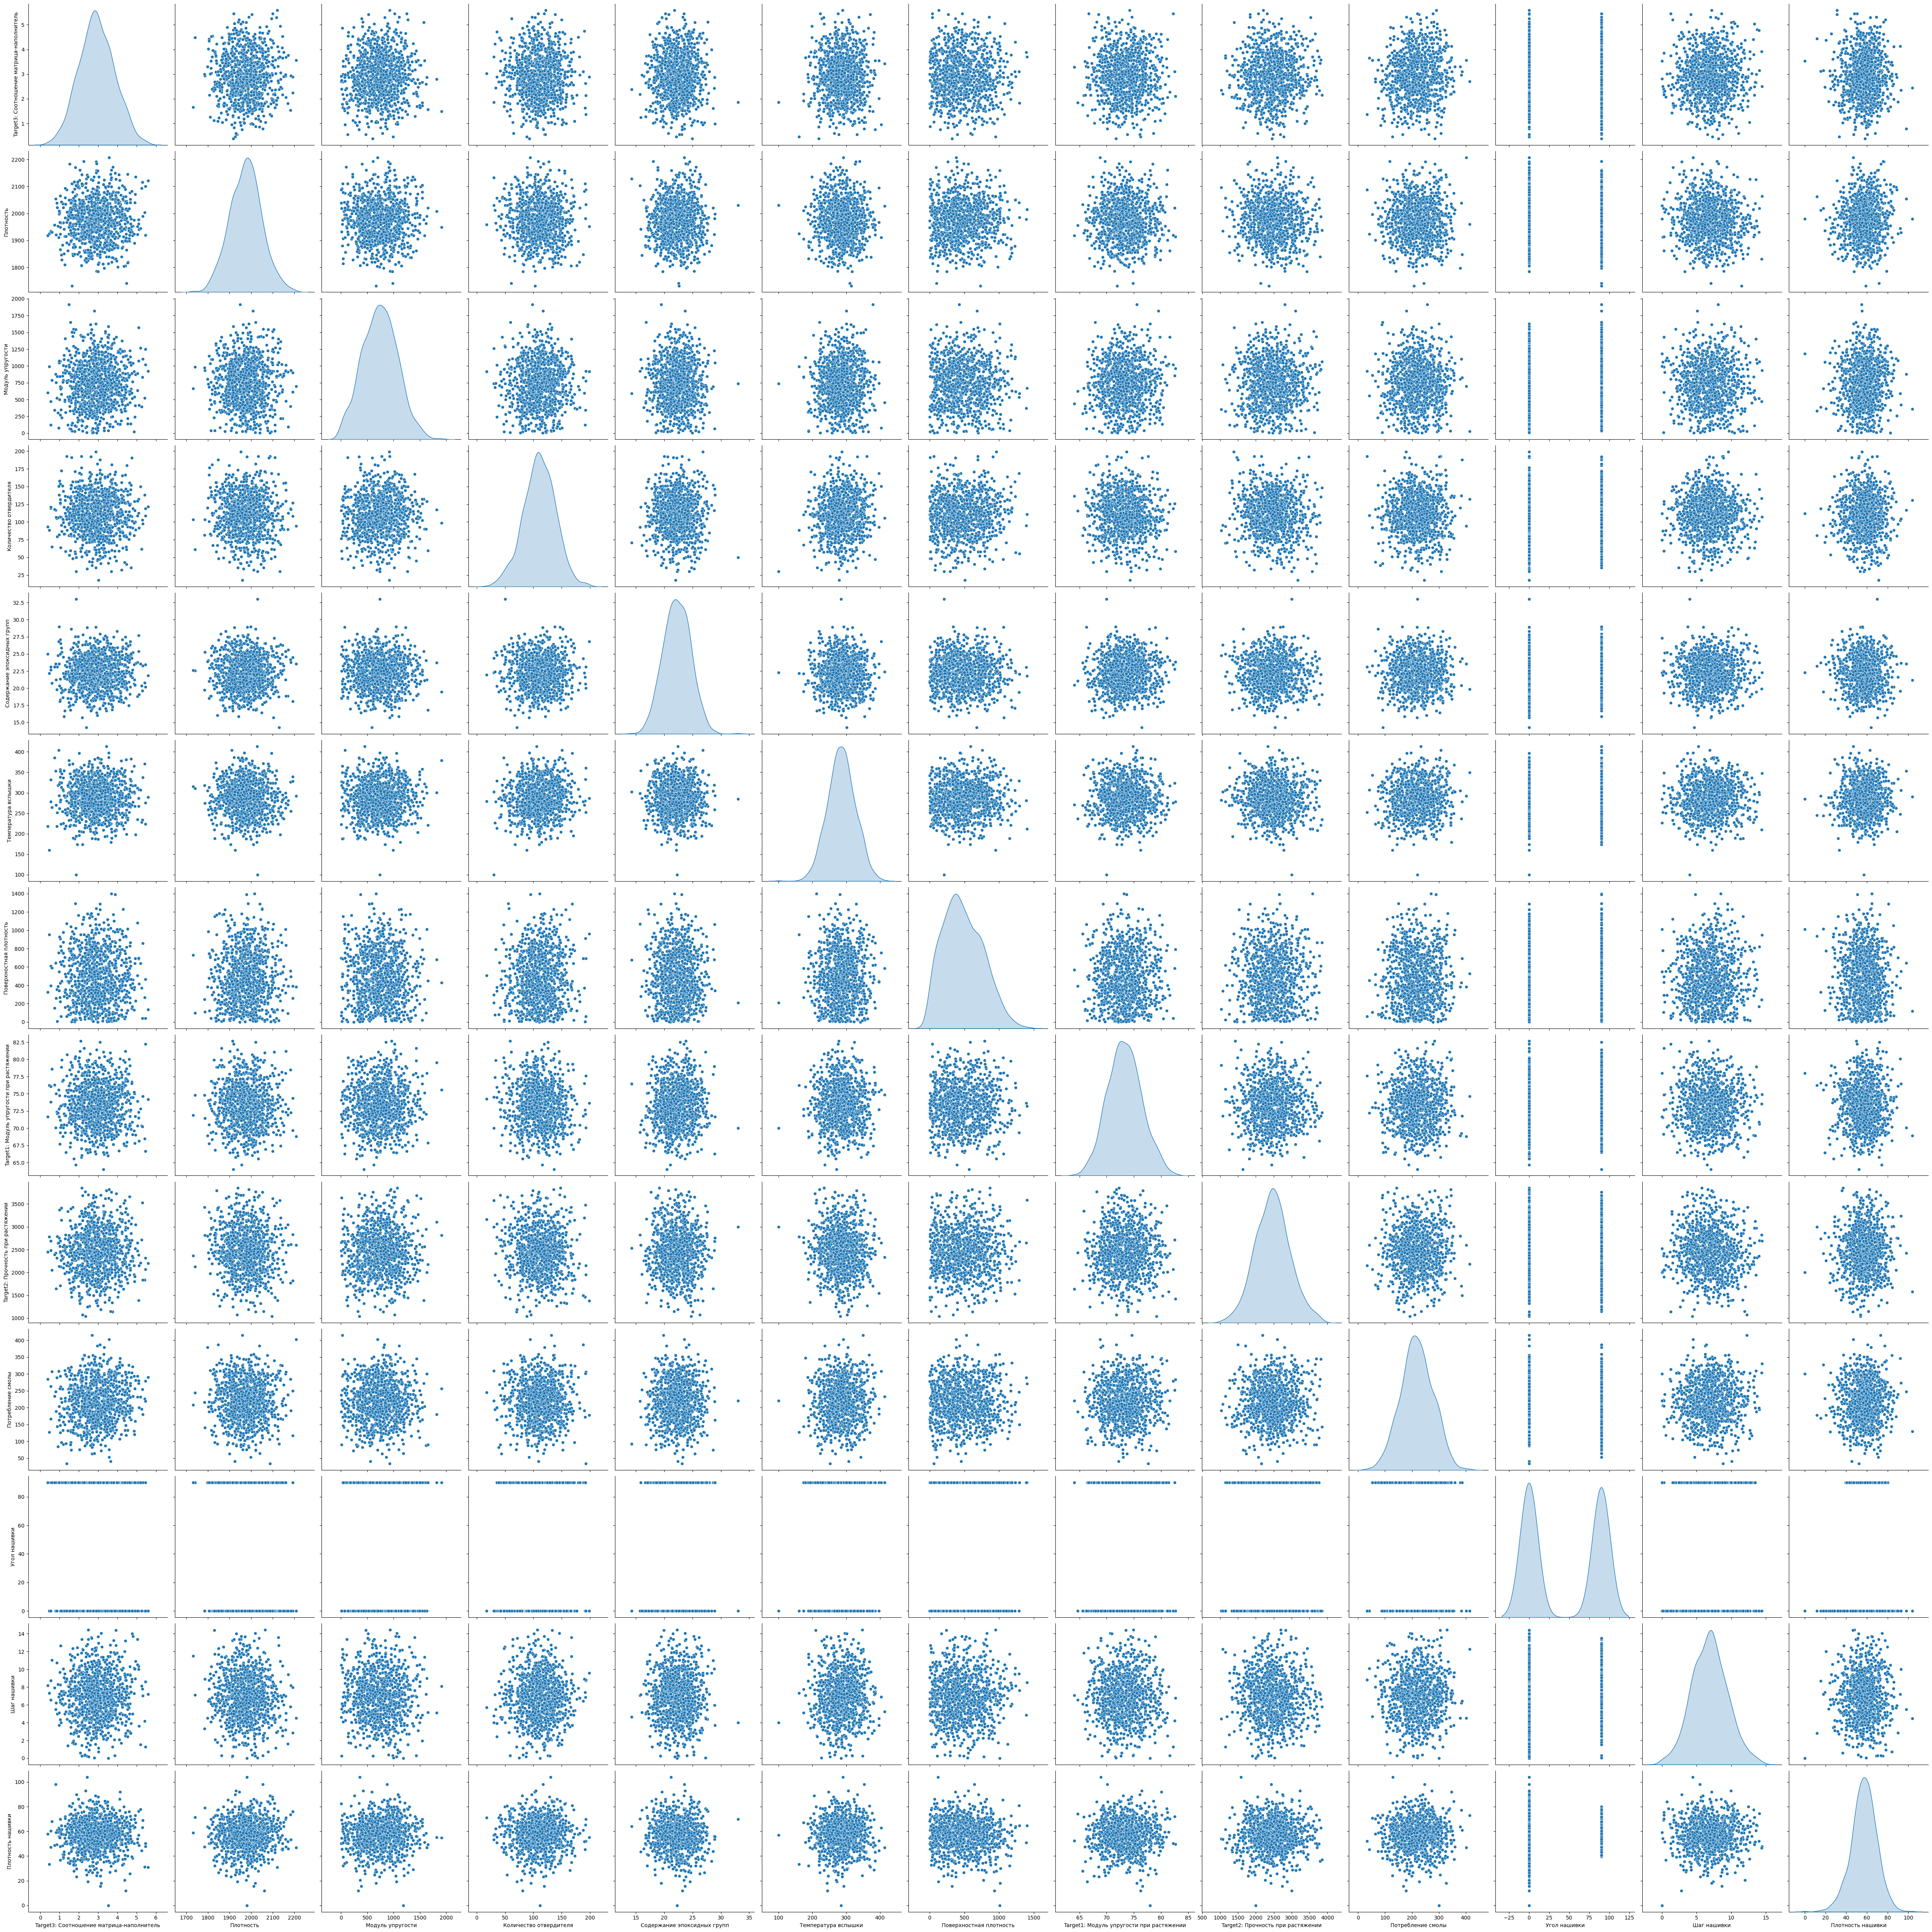

In [19]:
# Построим попарные графики рассеяния
sns.pairplot(df, height=4, diag_kind='kde');

На графиках видны выбросы, которые необходимо удалить.  
Для поиска выбросов будем использовать метод 3-х сигм и метод межквартильных расстояний.

In [20]:
count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    # методом 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    # методом межквартильных расстояний
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()

print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод межквартильных расстояний, выбросов:', count_iq)

Метод 3-х сигм, выбросов: 24
Метод межквартильных расстояний, выбросов: 93


Метод 3-х сигм определил 24 выброса, в то время как метод межквартильных расстояний - 93.  
Мы имеем дело с датасетом, очищенным от явного шума, поэтому целесообразно применить метод, дающий наименьшее количество выбросов.   
Метод 3-х сигм не позволит потерять большую часть значимой информации.

In [21]:
# Удалить выбросы методом 3-х сигм
outliers = pd.DataFrame(index=df.index)
for column in df:
    zscore = (df[column] - df[column].mean()) / df[column].std()
    outliers[column] = (zscore.abs() > 3)
df = df[outliers.sum(axis=1)==0]
df.shape

(1000, 13)

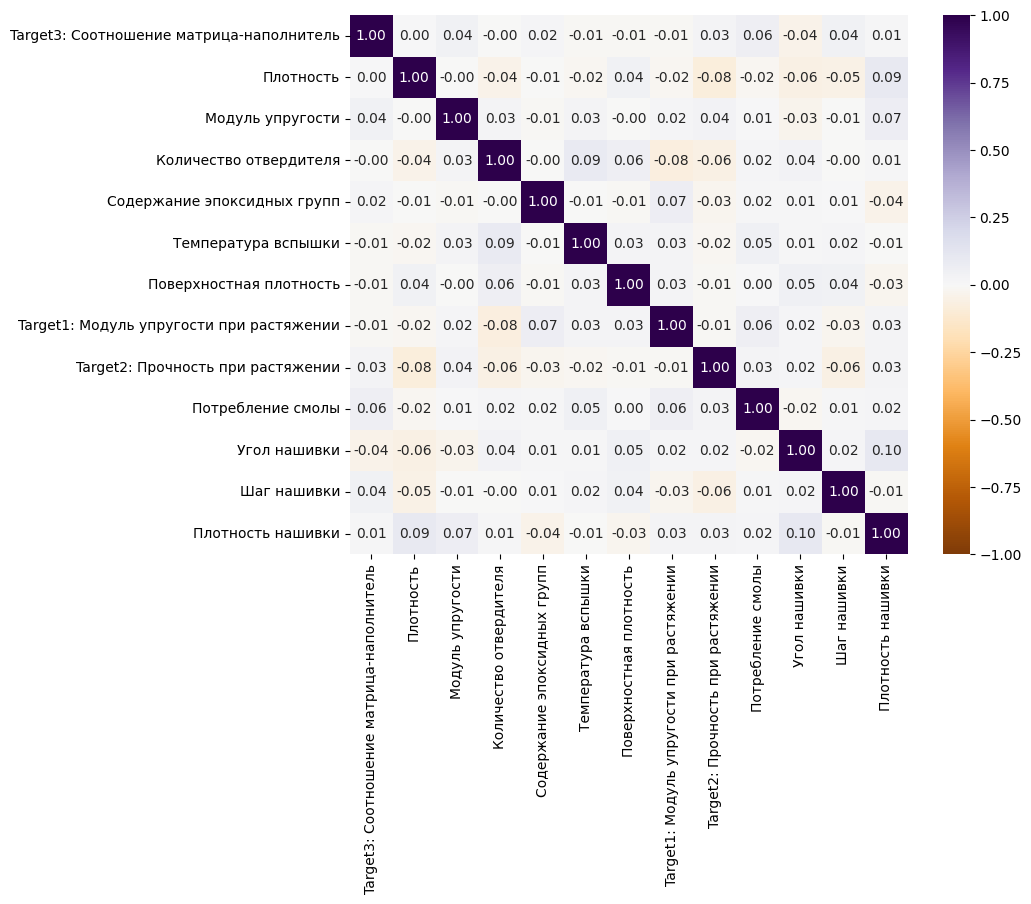

In [25]:
# Рассмотрим матрицу корреляции
matrix = df.corr()
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(matrix, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='PuOr', ax=ax)
plt.show()

Коэффициенты попарной корреляции между признаками, близкие к 0, указывают на отсутствие или наличие слабой линейной связи между признаками.  
Вероятно могут иметь место скрытые зависимости между признаками, которые не учитываются при расчете коэффициента корреляции.  
Можно сделать вывод, что применение линейных моделей регрессии не даст приемлемого результата.

<AxesSubplot: ylabel='Density'>

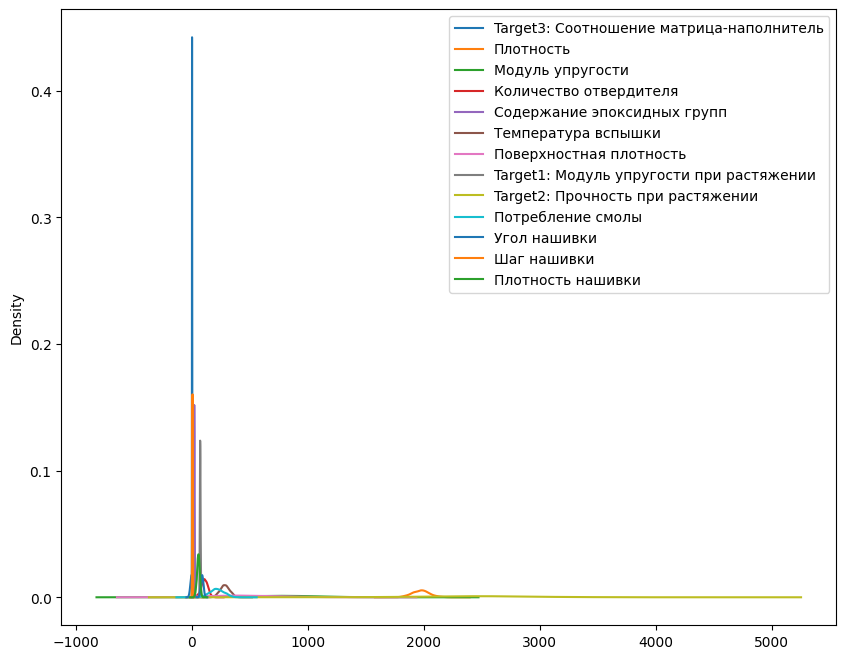

In [26]:
# Проведем оценку плотности ядра
fig, ax = plt.subplots(figsize=(10, 8))
df.plot(kind='kde', ax=ax)

Признаки находятся в разных диапазонах и распределении, необходимо провести нормализацию.

# Нормализация

In [29]:
scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)
df_norm = pd.DataFrame(d, columns=names).round(2)
df_norm.head()

Target3: Соотношение матрица-наполнитель  Плотность  Модуль упругости  \
0                                      0.28       0.60              0.45   
1                                      0.28       0.60              0.45   
2                                      0.46       0.60              0.46   
3                                      0.46       0.53              0.45   
4                                      0.42       0.31              0.49   

   Количество отвердителя  Содержание эпоксидных групп  Температура вспышки  \
0                    0.12                         0.61                 0.48   
1                    0.61                         0.42                 0.55   
2                    0.50                         0.50                 0.48   
3                    0.50                         0.50                 0.48   
4                    0.50                         0.50                 0.48   

   Поверхностная плотность  Target1: Модуль упругости при растяжении  \
0                     0.16                                      0.32   
1                     0.16                                      0.32   
2                     0.16                                      0.32   
3                     0.16                                      0.32   
4                     0.16                                      0.32   

   Target2: Прочность при растяжении  Потребление смолы  Угол нашивки  \
0                                0.7               0.52           0.0   
1                                0.7               0.52           0.0   
2                                0.7               0.52           0.0   
3                                0.7               0.52           0.0   
4                                0.7               0.52           0.0   

   Шаг нашивки  Плотность нашивки  
0         0.28               0.54  
1         0.34               0.37  
2         0.34               0.50  
3         0.34               0.54  
4         0.34               0.68

# Оценка плотности ядра после нормализации

<AxesSubplot: ylabel='Density'>

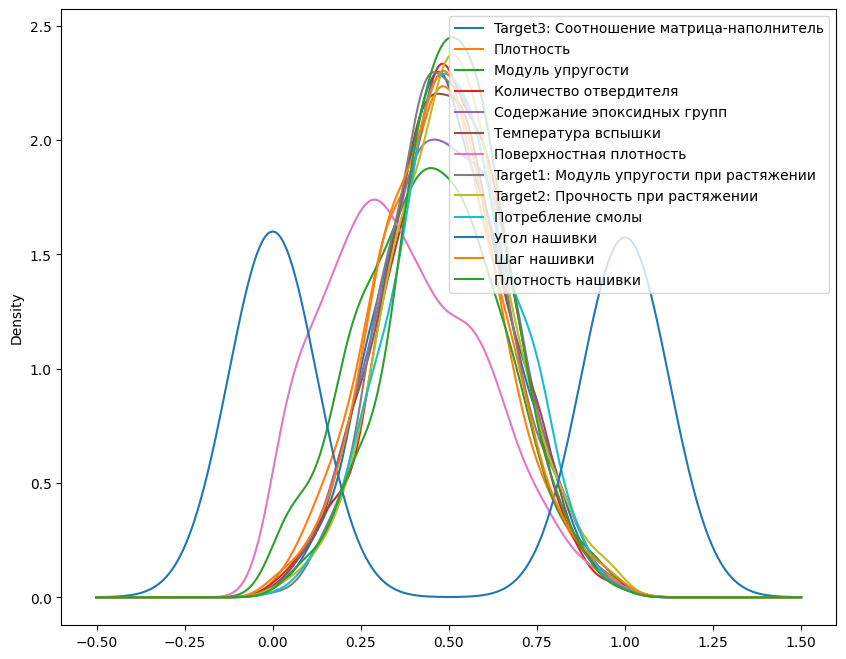

In [30]:
fig, ax = plt.subplots(figsize=(10, 8))
df_norm.plot(kind='kde', ax=ax)

## Оценим ящик с усами после нормализации

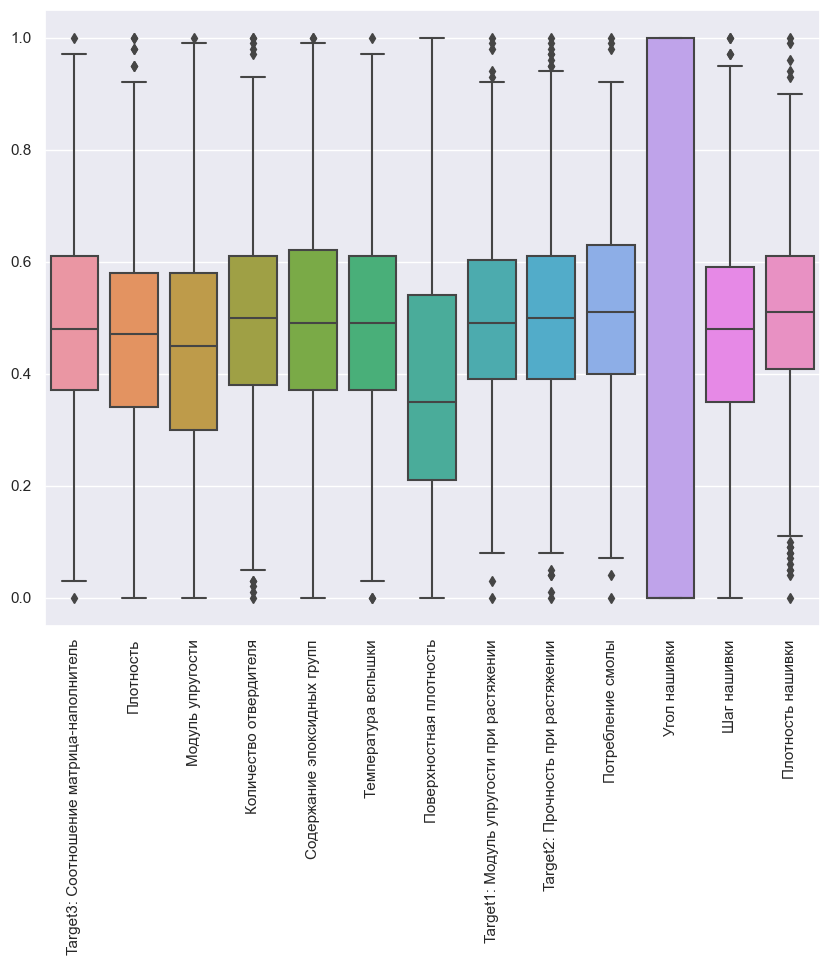

In [31]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.boxplot(data=df_norm)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

Средние значения примерно в одном диапазоне.. Самое большое количество выбросов в ..

In [ ]:
## Модели для прогноза модуля упругости при растяжении (Target1) и прочности при растяжении (Target2).

## Разделение данных на Х и у

In [ ]:
df_split = df_drop_norm.copy()
print(df_split.shape)

In [ ]:
y1 = df_split['Target1: Модуль упругости при растяжении']
y2 = df_split['Target2: Прочность при растяжении']
y3 = df_split['Target3: Соотношение матрица-наполнитель']

#Переменную "'Target3: Соотношение матрица-наполнитель'" удалим из датасета: эта величина будет предсказываться нейронной сетью ниже.
X1 = df_split.drop(['Target3: Соотношение матрица-наполнитель', 'Target1: Модуль упругости при растяжении'], axis = 1)
X2 = df_split.drop(['Target3: Соотношение матрица-наполнитель', 'Target2: Прочность при растяжении'], axis = 1)
X3 = df_split.drop(['Target1: Модуль упругости при растяжении', 'Target2: Прочность при растяжении', 'Target3: Соотношение матрица-наполнитель'], axis = 1)

In [ ]:
print(X1.shape, y1.shape)
print(X2.shape, y2.shape)
print(X3.shape, y3.shape)